In [43]:
import pandas as pd
from easse.annotation.sentence_level import SentenceOperationAnnotator

In [44]:
pd.set_option('display.max_colwidth', 0)

# Automatic Labelling of Sentence-level Simplification Operations

In [45]:
def identify_simplification_operations(df, orig_col='original', simp_col='simplification', tokenizer='moses', lowercase=False):
    sent_simop_annot = SentenceOperationAnnotator(tokenizer=tokenizer, lowercase=lowercase)
    dataset_labels = sent_simop_annot.identify_operations(df[orig_col].values, df[simp_col].values)
    
    labels = {'compression': [], 'paraphrasing': [], 'splitting': [], 'addition': []}
    for sent_labels in dataset_labels:
        labels['addition'].append(int('A' in sent_labels or 'B-A' in sent_labels))
        labels['compression'].append(int('D' in sent_labels or 'B-D' in sent_labels))
        labels['paraphrasing'].append(int('R' in sent_labels or 'B-R' in sent_labels))
        labels['splitting'].append(int('S' in sent_labels))
        
    df['addition'] = labels['addition']
    df['compression'] = labels['compression']
    df['paraphrasing'] = labels['paraphrasing']
    df['splitting'] = labels['splitting']
    
    df['none'] = (df[orig_col] == df[simp_col]).astype(int)
    df['unidentified'] = ((df['compression'] + df['paraphrasing'] + df['splitting'] + df['addition'] + df['none']) == 0).astype(int)
    
    return df

In [65]:
df_simpletico = pd.read_excel('dataset/SimpTICO-19 - Spanish - Test.xls')[['stringID', 'original', 'simplification', 'comments']]

In [66]:
df_simpletico['no_simplification'] = df_simpletico['comments'] == 'NS'

In [67]:
df_simpletico

,stringID,original,simplification,comments,no_simplification
0,PubMed_7:221,"El tiempo promedio desde la aparición hasta la muerte era de 9,5 días (entre 4,8 y 13).","El tiempo promedio desde la aparición hasta la muerte era de 9,5 días (entre 4,8 y 13).",NS,True
1,PubMed_7:249,El SARS-CoV y el MERS-CoV pueden sobrevivir in vitro durante 48 horas en un ambiente seco y hasta 5 días a menos de 20 °C con una humedad del 40-50 %.,El SARS-CoV y el MERS-CoV pueden sobrevivir in vitro durante 48 horas en un ambiente seco y hasta 5 días a menos de 20 °C con una humedad del 40-50 %.,NS,True
2,Wikisource_2:2162,"Estas son las medidas que creemos necesarias para apoyarnos mutuamente a fin de poder continuar trabajando, darle a nuestro movimiento el apoyo necesario y brindarle al mundo el servicio en el que confía.","Estas son las medidas que creemos necesarias para apoyarnos mutuamente a fin de poder continuar trabajando, darle a nuestro movimiento el apoyo necesario y brindarle al mundo el servicio en el que confía.",NS,True
3,Wikipedia_handpicked_1:1491,"En respuesta a un brote en desarrollo en Irán, la OMS envió allí a un equipo de misión conjunta para evaluar la situación. El 28 de febrero, funcionarios de la OMS dijeron que la evaluación de la amenaza por coronavirus a nivel mundial se elevaría de ""alta"" a ""muy alta"", su nivel más alto de alerta y evaluación del riesgo.","En respuesta a un brote en desarrollo en Irán, la OMS envió allí a un equipo de misión conjunta para evaluar la situación. El 28 de febrero, funcionarios de la OMS dijeron que la evaluación de la amenaza por coronavirus a nivel mundial se elevaría de ""alta"" a ""muy alta"", su nivel más alto de alerta y evaluación del riesgo.",NS,True
4,PubMed_11:1054,Es necesario actualizar los criterios de diagnóstico de los “casos sospechosos” y “casos confirmados” de COVID-19,Es necesario actualizar los criterios de diagnóstico de los “casos sospechosos” y “casos confirmados” de COVID-19,NS,True
...,...,...,...,...,...
2129,Wikipedia_handpicked_7:2039,"La Organización Mundial de la Salud (OMS) recomienda que los pacientes que ingresan se separen en distintas salas de espera en función de si se sospecha o no que puedan tener COVID-19. Además de otros tipos de equipos de protección personal, la OSHA recomienda el uso de mascarillas para aquellas personas que trabajen a una distancia de hasta 6 pies de los pacientes que se hayan contagiado o se sospeche que se han contagiado de SARS-CoV-2 y para aquellos que realicen procedimientos de generación de aerosoles.","La Organización Mundial de la Salud recomienda que los pacientes que ingresan se separen en distintas salas de espera si se sospecha o no que puedan tener COVID-19. Además de otros tipos de equipos de protección personal, la OSHA recomienda el uso de mascarillas para aquellas personas que trabajen a una distancia, de hasta 6 pies, de los pacientes que se hayan contagiado o se sospeche que se han contagiado de SARS-CoV-2. También para aquellos que realicen procedimientos de generación de aerosoles.",NaN,False
2130,Wikipedia_handpicked_7:2040,"En los Estados Unidos, se deben usar respiradores N95 con mascarilla de filtrado aprobados por NIOSH o superiores en el contexto de un programa respiratorio integral escrito que incluya pruebas de ajuste, capacitaciones y exámenes médicos.","En los Estados Unidos, se deben usar respiradores N95 con mascarilla de filtrado aprobados por NIOSH, o superiores, en el contexto de un programa respiratorio integral escrito que incluya pruebas de ajuste, capacitaciones y exámenes médicos.",NaN,False
2131,Wikipedia_handpicked_7:2041,"Otros tipos de mascarillas pueden brindar una mayor protección y mejorar la comodidad del trabajador. La OMS no recomienda el uso de monos protectores, ya que la COVID-19 es una enfermedad respiratoria, no una que se transmita por los fluidos corporales.","Otros tipos de mascarillas pueden brindar una mayor protección y mejorar la comodidad del trabajador. La OMS

In [68]:
df_simpletico_with_labels = identify_simplification_operations(df_simpletico)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2022-04-21 14:31:47,696 - simalign.simalign - INFO - Initialized the EmbeddingLoader with model: bert-base-multilingual-cased
2134it [07:50,  4.

In [69]:
df_simpletico_with_labels[df_simpletico_with_labels['none'] != df_simpletico_with_labels['no_simplification']]

,stringID,original,simplification,comments,no_simplification,addition,compression,paraphrasing,splitting,none,unidentified
30,CMU_1:97,siento dolor en el pecho,Siento dolor en el pecho,NS,True,0,0,0,0,0,1
31,CMU_1:102,como presión arterial alta o diabetes,Como presión arterial alta o diabetes,NS,True,0,0,0,0,0,1
32,CMU_1:117,desde que tiene fiebre,Desde que tiene fiebre,NS,True,0,0,0,0,0,1
33,CMU_1:121,cuénteme sobre su dolor de pecho,Cuénteme sobre su dolor de pecho,NS,True,0,0,0,0,0,1
34,CMU_1:136,¿dónde siente dolor en el pecho?,¿Dónde siente dolor en el pecho?,NS,True,0,0,0,0,0,1
35,CMU_1:141,dijo que siente este dolor de pecho,Dijo que siente este dolor de pecho,NS,True,0,0,0,0,0,1
36,PubMed_7:219,"En promedio, transcurrían 5 días (de 2 a 9) entre la aparición y el diagnóstico de la COVID-19.","En promedio, transcurrían 5 días (de 2 a 9) entre la aparición y el diagnóstico de la COVID-19.",NS,True,0,0,0,0,0,1
37,PubMed_7:222,"El número reproductivo básico (R0) era de 3,77 (IC del 95 %: 3,51-4,05) y el R0 ajustado era de 2,23-4,82.","El número reproductivo básico (R0) era de 3,77 (IC del 95 %: 3,51-4,05) y el R0 ajustado era de 2,23-4,82.",NS,True,0,0,0,0,0,1
41,PubMed_7:238,"El 18 de febrero de 2020, Zhou, et al., reveló la estructura de criomicroscopía electrónica de la ACE2 humana de longitud completa en resolución 2.9 Å, en complejo con el aminoácido transportador B0AT1.","El 18 de febrero de 2020, Zhou, et al., reveló la estructura de criomicroscopía electrónica de la ACE2 humana de longitud completa en resolución 2.9 Å, en complejo con el aminoácido transportador B0AT1.",NS,True,0,0,0,0,0,1
55,Wikipedia_handpicked_1:1229,Las estimaciones chinas de la proporción de personas asintomáticas oscilan de unas pocas a un 44 %.,Las estimaciones chinas de la proporción de personas asintomáticas oscilan de unas pocas a un 44 %.,NS,True,0,0,0,0,0,1


In [70]:
df_simpletico_with_labels.to_csv("dataset/simpletico19.test.es.csv", index=False)

# Frequency Analysis of Simplification Operations

In [155]:
from matplotlib import pyplot as plt

In [156]:
simpletico19_datasets = {'En-Dev': pd.read_csv("dataset/simpletico19.dev.en.csv"),
                         'En-Test': pd.read_csv("dataset/simpletico19.test.en.csv"),
                         'Es-Dev': pd.read_csv("dataset/simpletico19.dev.es.csv"),
                         'Es-Test': pd.read_csv("dataset/simpletico19.test.es.csv")}

In [160]:
df = simpletico19_datasets['En-Dev']

In [162]:
df[df['none'] == 1]

,stringID,original,simplification,comments,no_simplification,addition,compression,paraphrasing,splitting,none,unidentified
817,Wikipedia_handpicked_5:1933,"At least 520,000 students and their families may be affected by food insecurity as a result of school closures. School lunch programmes are the second-biggest anti-hunger initiative in the United States after food stamps.","At least 520,000 students and their families may be affected by food insecurity as a result of school closures. School lunch programmes are the second-biggest anti-hunger initiative in the United States after food stamps.",NS,True,0,0,0,0,1,0
818,Wikipedia_handpicked_5:1931,Many children worldwide rely on free or discounted meals at schools.,Many children worldwide rely on free or discounted meals at schools.,NS,True,0,0,0,0,1,0
819,Wikivoyage_1:2354,"access in and out of a town, village, or city completely blocked","access in and out of a town, village, or city completely blocked",NS,True,0,0,0,0,1,0
820,PubMed_10:993,"As the experience from the 2009 H1N1 pandemic has shown, NPIs can be a crucial component of pandemic mitigation.","As the experience from the 2009 H1N1 pandemic has shown, NPIs can be a crucial component of pandemic mitigation.",NS,True,0,0,0,0,1,0
821,Wikivoyage_1:2357,"businesses, activities, and attractions closed","businesses, activities, and attractions closed",NS,True,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
966,PubMed_10:865,This will be an extra blood sample taken from people who are attending their general practice for a scheduled blood test.,This will be an extra blood sample taken from people who are attending their general practice for a scheduled blood test.,NS,True,0,0,0,0,1,0
967,Wikipedia_handpicked_5:1889,Universities and schools around the country closed.,Universities and schools around the country closed.,NS,True,0,0,0,0,1,0
968,PubMed_10:881,We also produce an annual report.,We also produce an annual report.,NS,True,0,0,0,0,1,0
969,PubMed_9:849,What is added by this report?,What is added by this report?,NS,True,0,0,0,0,1,0


## Distribution of Single-Operation Labels

In [72]:
OPERATIONS = ['compression', 'paraphrasing', 'splitting', 'addition', 'none', 'unidentified']
singlelabels_freq = {}
for dataset_name, df_data in simpletico19_datasets.items():
    singlelabels_freq[dataset_name] = 100. * df_data[OPERATIONS].sum() / len(df_data)
df_singlelabels_freq = pd.DataFrame(singlelabels_freq)

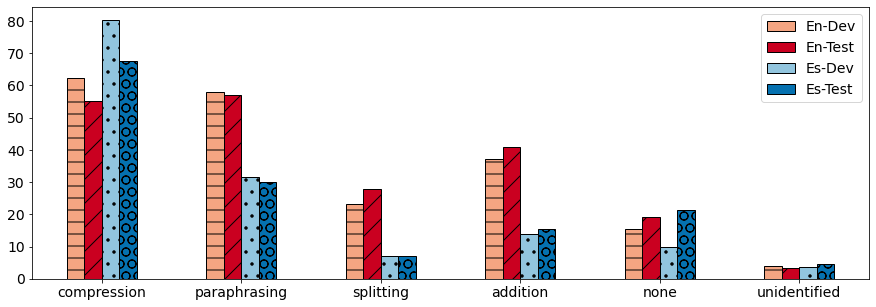

In [150]:
plt.rcParams['font.size'] = '14'

plot_singlelabels_freq = df_singlelabels_freq.plot(kind='bar', color=['#f4a582','#ca0020','#92c5de', '#0571b0'], orientation='vertical',  edgecolor='black',
                                                   figsize=(15,5), rot=0)
hatches = ['-'] * 6 + ['/'] * 6 + ['.'] * 6 + ['O'] * 6
for patch, hatch in zip(plot_singlelabels_freq.patches, hatches):
    patch.set_hatch(hatch)

In [151]:
plot_singlelabels_freq.get_figure().savefig('figs/singlelabel_operations_frequency.pdf', dpi=300, bbox_inches='tight')

## Distribution of Multi-Operation Labels

In [78]:
from sklearn.preprocessing import MultiLabelBinarizer
from more_itertools import powerset

In [84]:
mlb = MultiLabelBinarizer()
mlb.fit([OPERATIONS])
mlb.classes_

array(['addition', 'compression', 'none', 'paraphrasing', 'splitting',
       'unidentified'], dtype=object)

In [86]:
multiop_labels = list(powerset(OPERATIONS))
multiop_names = ['compression\n(only)', 'paraphrasing\n(only)', 'splitting\n(only)', 'addition\n(only)', 
                 'compression\nparaphrasing', 'compression\nsplitting', 'compression\naddition', 'paraphrasing\nsplitting', 'paraphrasing\naddition', 'splitting\naddition',
                 'compression\nparaphrasing\nsplitting', 'compression\nparaphrasing\naddition', 'paraphrasing\nsplitting\naddition',
                 'compression\nparaphrasing\nsplitting\naddition']
multilabels_freq = {}
for dataset_name, df_data in simpletico19_datasets.items():    
    df_data['compression\n(only)'] = ((df_data['compression'] == 1) & 
                                          (df_data['paraphrasing'] == 0) & 
                                          (df_data['splitting'] == 0) & 
                                          (df_data['addition'] == 0) &
                                          (df_data['none'] == 0)).astype(int)
    df_data['paraphrasing\n(only)'] = ((df_data['compression'] == 0) & 
                                          (df_data['paraphrasing'] == 1) & 
                                          (df_data['splitting'] == 0) & 
                                          (df_data['addition'] == 0) &
                                          (df_data['none'] == 0)).astype(int)
    df_data['splitting\n(only)'] = ((df_data['compression'] == 0) & 
                                          (df_data['paraphrasing'] == 0) & 
                                          (df_data['splitting'] == 1) & 
                                          (df_data['addition'] == 0) &
                                          (df_data['none'] == 0)).astype(int)
    df_data['addition\n(only)'] = ((df_data['compression'] == 0) & 
                                          (df_data['paraphrasing'] == 0) & 
                                          (df_data['splitting'] == 0) & 
                                          (df_data['addition'] == 1) &
                                          (df_data['none'] == 0)).astype(int)
    
    df_data['compression\nparaphrasing'] = ((df_data['compression'] == 1) & 
                                                (df_data['paraphrasing'] == 1) & 
                                                (df_data['splitting'] == 0) &
                                                (df_data['addition'] == 0) &
                                                (df_data['none'] == 0)).astype(int)
    df_data['compression\nsplitting'] = ((df_data['compression'] == 1) & 
                                             (df_data['paraphrasing'] == 0) & 
                                             (df_data['splitting'] == 1) & 
                                             (df_data['addition'] == 0) &
                                             (df_data['none'] == 0)).astype(int)
    df_data['compression\naddition'] = ((df_data['compression'] == 1) & 
                                             (df_data['paraphrasing'] == 0) & 
                                             (df_data['splitting'] == 0) & 
                                             (df_data['addition'] == 1) &
                                             (df_data['none'] == 0)).astype(int)
    df_data['paraphrasing\nsplitting'] = ((df_data['compression'] == 0) & 
                                              (df_data['paraphrasing'] == 1) & 
                                              (df_data['splitting'] == 1) &
                                              (df_data['addition'] == 0) &
                                              (df_data['none'] == 0)).astype(int)
    df_data['paraphrasing\naddition'] = ((df_data['compression'] == 0) & 
                                              (df_data['paraphrasing'] == 1) & 
                                              (df_data['splitting'] == 0) &
                                              (df_data['addition'] == 1) &
                                              (df_data['none'] == 0)).astype(int)
    df_data['splitting\naddition'] = ((df_data['compression'] == 0) & 
                                              (df_data['paraphrasing'] == 0) & 
                                              (df_data['splitting'] == 1) &
                                              (df_data['addition'] == 1) &
                                              (df_data['none'] == 0)).astype(int)
    
    df_data['compression\nparaphrasing\nsplitting'] = ((df_data['compression'] == 1) & 
                                                           (df_data['paraphrasing'] == 1) & 
                                                           (df_data['splitting'] == 1) &
                                                           (df_data['addition'] == 0) &
                                                           (df_data['none'] == 0)).astype(int)
    df_data['compression\nparaphrasing\naddition'] = ((df_data['compression'] == 1) & 
                                                           (df_data['paraphrasing'] == 1) & 
                                                           (df_data['splitting'] == 0) &
                                                           (df_data['addition'] == 1) &
                                                           (df_data['none'] == 0)).astype(int)
    df_data['paraphrasing\nsplitting\naddition'] = ((df_data['compression'] == 0) & 
                                                           (df_data['paraphrasing'] == 1) & 
                                                           (df_data['splitting'] == 1) &
                                                           (df_data['addition'] == 1) &
                                                           (df_data['none'] == 0)).astype(int)
    df_data['compression\nparaphrasing\nsplitting\naddition'] = ((df_data['compression'] == 1) & 
                                                                     (df_data['paraphrasing'] == 1) & 
                                                                     (df_data['splitting'] == 1) &
                                                                     (df_data['addition'] == 1) &
                                                                     (df_data['none'] == 0)).astype(int)
    
    multilabels_freq[dataset_name] = 100. * df_data[multiop_names + ['none', 'unidentified']].sum() / len(df_data)
df_multilabels_freq = pd.DataFrame(multilabels_freq)

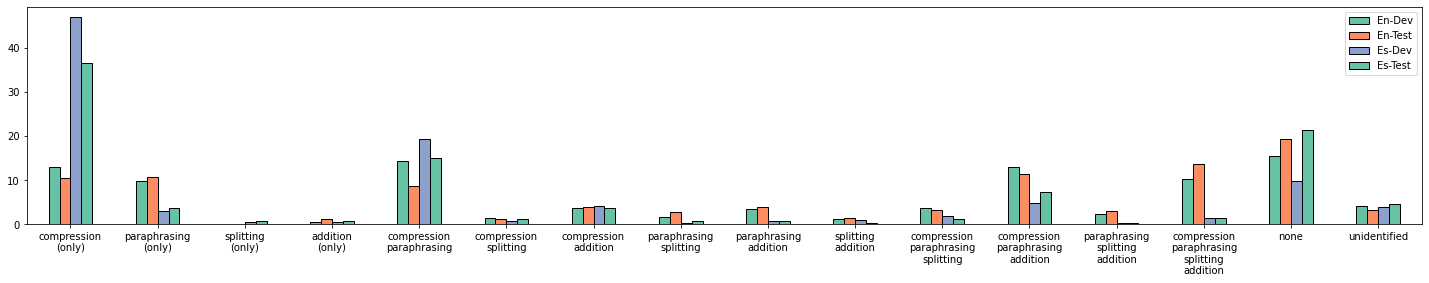

In [89]:
plot_multilabels_freq = df_multilabels_freq.plot(kind='bar', color=['#66c2a5','#fc8d62','#8da0cb'], orientation='vertical',  edgecolor='black', figsize=(25,4), rot=0)

In [ ]:
# plot_multilabels_freq.get_figure().savefig('multilabel_operations_frequency.pdf', dpi=300, bbox_inches='tight')